In [1]:
from keras.datasets import reuters
# 로이터 뉴스 데이터 로딩, num_words 사용할 상위 단어수, maxlen 상위 1000개 단어
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)


In [2]:
from unittest.util import _MAX_LENGTH
from tensorflow.keras.preprocessing import sequence
# 가장 긴 길이를 기준으로 사이즈를 맞추고 남는 부분을 0으로 채움
X_train = sequence.pad_sequences(X_train, maxlen=50) 
X_test = sequence.pad_sequences(X_test, maxlen=50)

In [3]:
from keras.utils import np_utils
# 원핫인코딩
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
model = Sequential()
# 임베딩 레이어 Embedding(단어의개수, 벡터크기, 입력사이즈)
model.add(Embedding(1000,100)) #1000개의 단어가 입력되어 100차원으로 출력
# 문장을 단어들의 시퀀스로 간주하고 순환 레이어의 입력으로, 출력노드수 100
model.add(LSTM(100)) # Long Short-Term Memory
model.add(Dense(46, activation='softmax')) # 46개의 뉴스 카테고리
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         100000    
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 46)                4646      
                                                                 
Total params: 185,046
Trainable params: 185,046
Non-trainable params: 0
_________________________________________________________________


In [6]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(patience=3) # 조기학습종료 조건 / validation_split=0.2 학습용 중 20%로 파라미터 튜닝
hist=model.fit(X_train,y_train,batch_size=128,epochs=100,validation_split=0.2,callbacks=[early_stopping])


Epoch 1/100
57/57 [==============================] - 4s 24ms/step - loss: 2.7434 - accuracy: 0.3370 - val_loss: 2.4050 - val_accuracy: 0.3450
Epoch 2/100
57/57 [==============================] - 1s 13ms/step - loss: 2.3075 - accuracy: 0.4003 - val_loss: 2.0988 - val_accuracy: 0.4925
Epoch 3/100
57/57 [==============================] - 1s 13ms/step - loss: 2.0527 - accuracy: 0.4930 - val_loss: 2.0212 - val_accuracy: 0.4986
Epoch 4/100
57/57 [==============================] - 1s 13ms/step - loss: 1.9526 - accuracy: 0.5155 - val_loss: 1.9203 - val_accuracy: 0.5125
Epoch 5/100
57/57 [==============================] - 1s 13ms/step - loss: 1.8093 - accuracy: 0.5393 - val_loss: 1.7620 - val_accuracy: 0.5531
Epoch 6/100
57/57 [==============================] - 1s 13ms/step - loss: 1.6585 - accuracy: 0.5791 - val_loss: 1.6482 - val_accuracy: 0.5776
Epoch 7/100
57/57 [==============================] - 1s 13ms/step - loss: 1.5517 - accuracy: 0.6035 - val_loss: 1.5818 - val_accuracy: 0.5982
Epoch 

In [7]:
model.evaluate(X_test, y_test, verbose=1)

71/71 [==============================] - 0s 5ms/step - loss: 1.5154 - accuracy: 0.6349


[1.5153518915176392, 0.6349064707756042]

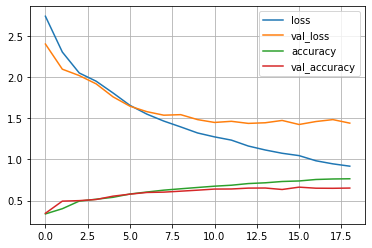

In [8]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss','accuracy','val_accuracy'])
plt.grid()
plt.show()


In [9]:
import numpy as np
pred=model.predict(X_test[12].reshape(-1,50))
np.argmax(pred[0])


1/1 [==============================] - 0s 427ms/step


10

In [10]:
np.argmax(y_test[12])

1

In [18]:
X_test

array([[722,  12,  20, ..., 510,  17,  12],
       [  7,  48,   2, ..., 760,  17,  12],
       [389, 410,   4, ...,   8,  17,  12],
       ...,
       [  0,   1,   2, ...,  11,  17,  12],
       [  7, 378, 104, ...,   8,  17,  12],
       [  6, 127, 122, ...,   2,  17,  12]])

In [12]:
# 2차원으로 변형
# X_test(샘플 수 상관없음, 2차원으로 변경)
pred = model.predict(X_test)
# pred = model.predict(X_test[12].reshape(-1, 500))
print(pred[10])
print(np.argmax(pred[10]))
print(np.argmax(y_test[12]))

71/71 [==============================] - 0s 4ms/step
[7.6842350e-03 8.6166483e-01 9.1642328e-03 2.7478833e-03 1.0130986e-02
 1.6644137e-02 4.3394300e-03 3.0102614e-05 3.4443193e-04 3.3712368e-03
 1.9735793e-02 1.7580911e-04 1.6808772e-05 9.4949231e-03 3.3810232e-03
 3.3346722e-03 1.3511877e-03 2.5660731e-04 2.6445901e-05 1.0283559e-03
 1.4376818e-04 3.7053484e-05 3.6316540e-03 2.1653266e-03 1.5254100e-02
 6.0772989e-04 1.5632380e-03 3.9725925e-04 8.9294007e-03 2.8287854e-05
 2.7509512e-05 2.7204007e-03 2.4919000e-03 8.0004084e-04 1.8925539e-05
 2.6908385e-05 3.6590027e-05 7.8604993e-04 2.5795766e-03 2.2536585e-04
 5.9560163e-05 1.8533344e-03 1.8632879e-04 3.7667298e-05 9.1914102e-05
 3.7695043e-04]
1
1
